In [1]:
using LinearAlgebra
using PyPlot
using Random
using Statistics
using Printf
using JLD2, FileIO
using ProgressMeter
include("HyperRPNNs.jl")
include("HyperECNNs.jl")
rng = MersenneTwister(0);

┌ Info: Precompiling JLD2 [033835bb-8acc-5ee8-8aae-3f567f8a3819]
└ @ Base loading.jl:1278
┌ Info: Precompiling ProgressMeter [92933f4c-e287-5a05-a399-4b506db050ca]
└ @ Base loading.jl:1278
┌ Info: Precompiling Quaternions [94ee1d12-ae83-5a48-8b1c-48b8ff168ae0]
└ @ Base loading.jl:1278


In [2]:
MarkerList = ["o","s","v","^",">","<"];
LineStyleList = ["solid","dashed","solid","dashed","solid","dashed"];

In [3]:
function imnoise(img,noise_std = 0.1)
    return clamp.(img + noise_std*randn(rng, Float64, size(img)),0,1)
end

imnoise (generic function with 2 methods)

In [4]:
function plotseq(Sequence,ind,N)
    ### Convergence Ratio ###
    
    num_elements = length(Sequence)
    
    #print(size(Sequence[1]))
    
    Sequencia_c = zeros(Complex,N,num_elements)
    
    for i=1:num_elements
        Sequencia_c[:,i] = Sequence[i][:,1]+im*Sequence[i][:,2]
    end
    
    Convergence_rate = zeros(num_elements-1,1)
    
    for j=1:num_elements-1
       Convergence_rate[j] = norm(Sequencia_c[:,j+1]-Sequencia_c[:,j])/norm(Sequencia_c[:,j+1])
    end
    
    c1 = 0
    k = ind
    if k>6
        c1 = c1+1
        k = c1
    end
    
    c2 = 0
    v = ind
    if v>6
        c2 = c2+1
        v = c2
    end 
    
    return k,v,Convergence_rate,num_elements
end

plotseq (generic function with 1 method)

In [5]:
v = 0:0.2:1

0.0:0.2:1.0

In [6]:
length(v)

6

In [7]:
v[3]

0.4

In [8]:
modelo_1_total = []
modelo_2_total = []

Any[]

In [9]:
N = 200
P = 160
K = 256

Nsim = 100

alpha = 2
beta = -2

MultiStates = exp.(2*pi*collect(0:K-1)*im/K)
U=zeros(N,2,P)

Uc = rand(rng,MultiStates,(N,P))
U[:,1,:] = real.(Uc)
U[:,2,:] = imag.(Uc)

img = U[:,:,1]
xcopy = copy(img)


for i =1:Nsim   
    
    modelo1 = []
    modelo2 = []
    
    for j=1:length(v)
        
        noise = v[j]
    
        x = imnoise(img,noise)

        # verificando o adicionamento de ruido
        #println(norm(xcopy-x))

        y, it  = HyperRPNNs.Sync(HyperRPNNs.LambdaInner,[1,1],HyperRPNNs.csign,K,U,x,alpha,beta,  100)
        y, it2 = HyperECNNs.Sync(HyperECNNs.LambdaInner,[1,1],HyperECNNs.csign,K,U,x,alpha/N,beta,  100)

        append!(modelo1,it)
        append!(modelo2,it2)
    end
    
    append!(modelo_1_total,modelo1)
    append!(modelo_2_total,modelo1)

end


Hypercomplex ECNN (Synchronous) failed to converge in 100 iterations.
Hypercomplex ECNN (Synchronous) failed to converge in 100 iterations.
Hypercomplex ECNN (Synchronous) failed to converge in 100 iterations.
Hypercomplex ECNN (Synchronous) failed to converge in 100 iterations.
Hypercomplex ECNN (Synchronous) failed to converge in 100 iterations.
Hypercomplex ECNN (Synchronous) failed to converge in 100 iterations.
Hypercomplex ECNN (Synchronous) failed to converge in 100 iterations.
Hypercomplex ECNN (Synchronous) failed to converge in 100 iterations.
Hypercomplex ECNN (Synchronous) failed to converge in 100 iterations.
Hypercomplex ECNN (Synchronous) failed to converge in 100 iterations.
Hypercomplex ECNN (Synchronous) failed to converge in 100 iterations.
Hypercomplex ECNN (Synchronous) failed to converge in 100 iterations.
Hypercomplex ECNN (Synchronous) failed to converge in 100 iterations.
Hypercomplex ECNN (Synchronous) failed to converge in 100 iterations.
Hypercomplex ECNN (S

In [10]:
modelo1


LoadError: UndefVarError: modelo1 not defined

In [11]:
modelo2

LoadError: UndefVarError: modelo2 not defined

In [12]:
modelo_1_total

600-element Array{Any,1}:
 6
 6
 6
 6
 7
 7
 6
 6
 6
 6
 7
 7
 6
 ⋮
 6
 6
 6
 7
 7
 7
 6
 6
 6
 7
 7
 7

In [13]:
modelo_2_total

600-element Array{Any,1}:
 6
 6
 6
 6
 7
 7
 6
 6
 6
 6
 7
 7
 6
 ⋮
 6
 6
 6
 7
 7
 7
 6
 6
 6
 7
 7
 7

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may

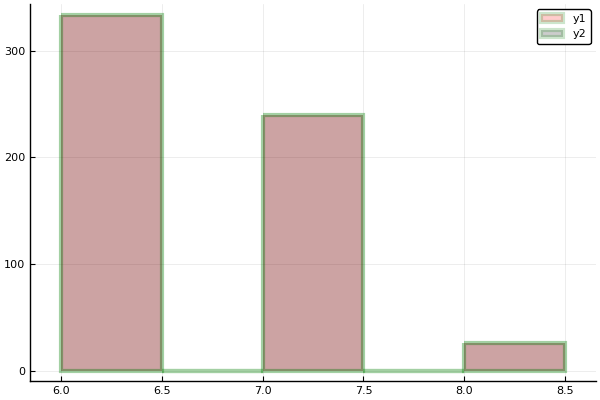

In [14]:
using Plots
using StatsPlots
using Distributions
pyplot()

n = 100
x1, x2 = rand(n), 3rand(n)

# see issue #186... this is the standard histogram call
# our goal is to use the same edges for both series
histogram(Any[modelo_1_total, modelo_2_total], line=(3,0.2,:green), fillcolor=[:red :black], fillalpha=0.2)

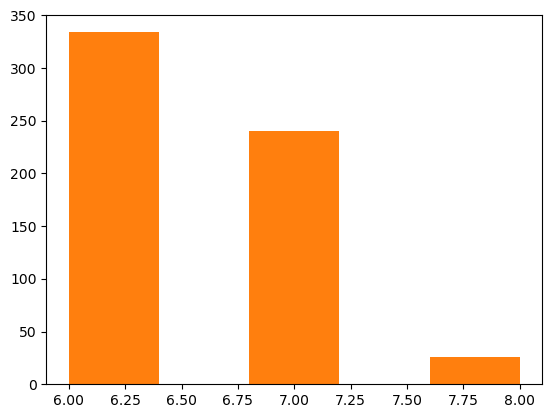

([334.0, 0.0, 240.0, 0.0, 26.0], [6.0, 6.4, 6.8, 7.2, 7.6, 8.0], (PyObject <matplotlib.patches.Rectangle object at 0x146db0190>, PyObject <matplotlib.patches.Rectangle object at 0x146da3250>, PyObject <matplotlib.patches.Rectangle object at 0x146db05e0>, PyObject <matplotlib.patches.Rectangle object at 0x146db08b0>, PyObject <matplotlib.patches.Rectangle object at 0x146db0b80>))

In [20]:
h = plt.hist(modelo_1_total,5)
h2 = plt.hist(modelo_2_total,5)

In [19]:
using PackageCompiler
compile_package("Gadfly", force=false)

plot(modelo_1_total,modelo_2_total, x="VoicePart", y="Height", Geom.boxplot)

LoadError: ArgumentError: Package PackageCompiler not found in current path:
- Run `import Pkg; Pkg.add("PackageCompiler")` to install the PackageCompiler package.
